# Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn
seaborn.set()


## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
data = pd.read_csv("./Bank-data.csv")

In [3]:
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [4]:
data.describe()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,258.500000,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606
std,149.677988,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990
min,0.000000,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,129.250000,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000
50%,258.500000,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000
75%,387.750000,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000
max,517.000000,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [5]:
x1 = data["duration"]
y = data["y"].map({"yes": 1, "no":0})


### Simple Logistic Regression

Run the regression.

In [6]:
x = sm.add_constant(x1)
reg = sm.Logit(y, x)
result = reg.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [7]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Fri, 15 May 2020   Pseudo R-squ.:                  0.2121
Time:                        19:35:34   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

### Find the odds of duration

In [8]:
np.exp(0.0051)

1.005113027136717

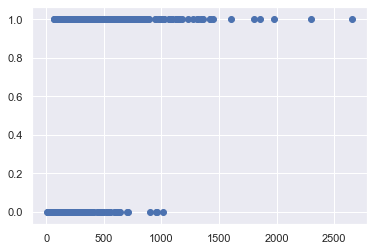

In [9]:
plt.scatter(x1, y)

In [11]:
result.pred_table()

array([[204.,  55.],
       [104., 155.]])